In [1]:
from __init__ import base_path
from utils import load_pkl, get_ids, get_labels
import os
import numpy as np

In [2]:
trainIds, valIds, testIds = get_ids()

Loading data from /net/if2/ks6cq/public_html/moviescope/data/index/trainIds.p
Loading data from /net/if2/ks6cq/public_html/moviescope/data/index/valIds.p
Loading data from /net/if2/ks6cq/public_html/moviescope/data/index/testIds.p


In [3]:
testPlots = load_pkl(os.path.join(base_path, "data", "plotFeatures_with_reverse_test.p"))
trainPlots = load_pkl(os.path.join(base_path, "data", "plotFeatures_with_reverse_train.p"))
valPlots = load_pkl(os.path.join(base_path, "data", "plotFeatures_with_reverse_val.p"))   

Loading data from /net/if2/ks6cq/public_html/moviescope/data/plotFeatures_with_reverse_test.p
Loading data from /net/if2/ks6cq/public_html/moviescope/data/plotFeatures_with_reverse_train.p
Loading data from /net/if2/ks6cq/public_html/moviescope/data/plotFeatures_with_reverse_val.p


In [4]:
len(valPlots)

491

In [5]:
valPlots[0]

(array([   0,    0,    0, ..., 1883,    1, 4448], dtype=int32),
 array([  0,   0,   0, ..., 541,   1, 259], dtype=int32))

In [6]:
len(valPlots[0]) # contains both plot in sequence and reverse.

2

In [7]:
trainLabels, valLabels, testLabels = get_labels()

Loading data from /net/if2/ks6cq/public_html/moviescope/data/labels/trainLabels.p
Loading data from /net/if2/ks6cq/public_html/moviescope/data/labels/valLabels.p
Loading data from /net/if2/ks6cq/public_html/moviescope/data/labels/testLabels.p


In [8]:
valLabels[0]

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [15]:
def transform_plot(plots):
    ## crop out the padded zeros and recover the original sequence
    new_array = [_p[0][::-1][:np.count_nonzero(_p[0])] for _p in plots]
    return new_array

In [10]:
new_valPlots = transform_plot(valPlots)

In [11]:
len(new_valPlots)

491

In [13]:
def prepare_plots(plots, labels, file_name, single_random_genre=False):
    
    ## prepare the txt file to feed to fastText
    
    print "Preparing...",file_name+".txt"
    newPlots = transform_plot(plots)
    
    with open("%s.txt" % file_name, "wb") as trainFile:    
        for _id, plot in enumerate(newPlots):
            if single_random_genre:
                genre = np.random.choice(np.where(labels[_id])[0])
                trainFile.write(" ".join(map(str,plot.tolist()))+" __label__%s" % genre+"\n")
            else:
                for genre in np.where(labels[_id])[0]:
                    trainFile.write(" ".join(map(str,plot.tolist()))+" __label__%s" % genre+"\n")
    trainFile.close()

In [13]:
prepare_plots(valPlots, valLabels, "val")
prepare_plots(trainPlots, trainLabels, "train")
prepare_plots(testPlots, testLabels, "test")

Preparing... val.txt
Preparing... train.txt
Preparing... test.txt


## fastText analysis

### Training 1-gram model

In [ ]:
!./fasttext supervised -input train.txt -wordNgrams 1 -output model_fasttext_1 -epoch 2000

### Precision-Recall @ 1,2,3

In [42]:
!./fasttext test model_fasttext_1.bin val.txt 1

P@1: 0.304
R@1: 0.304
Number of examples: 1252


In [43]:
!./fasttext test model_fasttext_1.bin val.txt 2

P@2: 0.26
R@2: 0.52
Number of examples: 1252


In [44]:
!./fasttext test model_fasttext_1.bin val.txt 3

P@3: 0.225
R@3: 0.675
Number of examples: 1252


### 2-gram model

In [ ]:
!./fasttext supervised -input train.txt -wordNgrams 2 -output model_fasttext_2 -epoch 2000

In [57]:
!./fasttext test model_fasttext_2.bin val.txt 1

P@1: 0.313
R@1: 0.313
Number of examples: 1252


In [56]:
!./fasttext test model_fasttext_2.bin val.txt 2

P@2: 0.273
R@2: 0.546
Number of examples: 1252


In [46]:
!./fasttext test model_fasttext_2.bin val.txt 3

P@3: 0.235
R@3: 0.705
Number of examples: 1252


### 3-gram model

In [ ]:
!./fasttext supervised -input train.txt -wordNgrams 3 -output model_fasttext_3 -epoch 2000

In [55]:
!./fasttext test model_fasttext_3.bin val.txt 1

P@1: 0.312
R@1: 0.312
Number of examples: 1252


In [54]:
!./fasttext test model_fasttext_3.bin val.txt 2

P@2: 0.272
R@2: 0.543
Number of examples: 1252


In [50]:
!./fasttext test model_fasttext_3.bin val.txt 3

P@3: 0.235
R@3: 0.706
Number of examples: 1252


### 5-gram model

In [ ]:
!./fasttext supervised -input train.txt -wordNgrams 5 -output model_fasttext_5 -epoch 2000

In [53]:
!./fasttext test model_fasttext_5.bin val.txt 1

P@1: 0.311
R@1: 0.311
Number of examples: 1252


In [52]:
!./fasttext test model_fasttext_5.bin val.txt 2

P@2: 0.272
R@2: 0.543
Number of examples: 1252


In [51]:
!./fasttext test model_fasttext_5.bin val.txt 3

P@3: 0.232
R@3: 0.696
Number of examples: 1252


In [64]:
prepare_plots(valPlots, valLabels, file_name="val_single", single_random_genre=True)

Preparing... val_single.txt


In [16]:
prepare_plots(testPlots, testLabels, file_name="test_single", single_random_genre=True)

Preparing... test_single.txt


In [14]:
!./fasttext predict-prob model_fasttext_1.bin val_single.txt 13 > fasttext_val_preds_1.txt

In [15]:
!./fasttext predict-prob model_fasttext_2.bin val_single.txt 13 > fasttext_val_preds_2.txt

In [16]:
!./fasttext predict-prob model_fasttext_3.bin val_single.txt 13 > fasttext_val_preds_3.txt

In [17]:
!./fasttext predict-prob model_fasttext_5.bin val_single.txt 13 > fasttext_val_preds_5.txt

## Mean AP for n-grams

In [4]:
def parse_ft_predictions(file_name):
    predictions = np.zeros((len(open(file_name).read().split('\n')[:-1]),13))
    with open(file_name) as pred_file:
        for j,line in enumerate(pred_file.readlines()):
            preds = line.split()
            for i in range(13):
                label = int(preds[2*i].split('label__')[-1])
                score = float(preds[2*i+1])
                predictions[j][label] = score
        return predictions

In [5]:
from evaluations import find_precision_recall

### 1-gram 

In [8]:
predictions = parse_ft_predictions("fasttext_val_preds_1.txt")

p,r,m = find_precision_recall(valLabels, predictions)
print m

{0: 0.6599199837415235, 1: 0.46673838829744779, 2: 0.25489806633520418, 3: 0.69759986719899825, 4: 0.54797721315729953, 5: 0.76672396400960907, 6: 0.6021627723013393, 7: 0.63710692162716709, 8: 0.75921708243665997, 9: 0.25927303040859756, 10: 0.48028149897217776, 11: 0.7615057600168289, 12: 0.59173644476540654, 'micro': 0.63056155583469864}


### 2-gram 

In [9]:
predictions = parse_ft_predictions("fasttext_val_preds_2.txt")
p,r,m = find_precision_recall(valLabels, predictions)
print m

{0: 0.69409114512446646, 1: 0.4913256970184478, 2: 0.34739257123875911, 3: 0.72608425308347191, 4: 0.61065430534884602, 5: 0.75758715215967209, 6: 0.62254184228909615, 7: 0.66081252389390022, 8: 0.77756267585713323, 9: 0.28269901261641434, 10: 0.52169262177586617, 11: 0.79699284881178944, 12: 0.62103994687079611, 'micro': 0.66136946214427317}


### 3-gram 

In [10]:
predictions = parse_ft_predictions("fasttext_val_preds_3.txt")
p,r,m = find_precision_recall(valLabels, predictions)
print m

{0: 0.70719858373256606, 1: 0.51384285930564022, 2: 0.35559105469189767, 3: 0.73874668314080005, 4: 0.63203395275391538, 5: 0.75889806285249395, 6: 0.60576804702688691, 7: 0.67319134866586405, 8: 0.76914666898895567, 9: 0.31409303418199541, 10: 0.5352359107300908, 11: 0.81196041817741471, 12: 0.64360964856199598, 'micro': 0.66977639891617113}


### 5-gram 

#### predictions = parse_ft_predictions("fasttext_val_preds_5.txt")
p,r,m = find_precision_recall(valLabels, predictions)
print m

## Evaluation on Test set

In [17]:
!./fasttext predict-prob model_fasttext_1.bin test_single.txt 13 > fasttext_test_preds_1.txt

In [18]:
!./fasttext predict-prob model_fasttext_2.bin test_single.txt 13 > fasttext_test_preds_2.txt

In [19]:
!./fasttext predict-prob model_fasttext_3.bin test_single.txt 13 > fasttext_test_preds_3.txt

In [20]:
!./fasttext predict-prob model_fasttext_5.bin test_single.txt 13 > fasttext_test_preds_5.txt

In [28]:
from matplotlib import pyplot as plt
%matplotlib inline

### 1-gram

In [39]:
predictions = parse_ft_predictions("fasttext_test_preds_1.txt")
p,r,m1 = find_precision_recall(testLabels, predictions)
print m1

{0: 0.62231986603087475, 1: 0.41775287647295928, 2: 0.33212274298583505, 3: 0.74209262934652565, 4: 0.57457975380094672, 5: 0.79364098672110428, 6: 0.56762209566341126, 7: 0.61626783634935567, 8: 0.62837209596243671, 9: 0.32878967399398812, 10: 0.45773123791915871, 11: 0.65003012277615668, 12: 0.63944834834615283, 'micro': 0.63917749364668919}


### 2-gram

In [40]:
predictions = parse_ft_predictions("fasttext_test_preds_2.txt")
p,r,m2 = find_precision_recall(testLabels, predictions)
print m2

{0: 0.66477518392085144, 1: 0.47366079793745919, 2: 0.35863356003221908, 3: 0.76005092979721023, 4: 0.61671152436057397, 5: 0.79747072271729524, 6: 0.62212107362854263, 7: 0.65234699283185904, 8: 0.61329433380429499, 9: 0.35997836990470644, 10: 0.49763171725623989, 11: 0.6630488634766295, 12: 0.6669581431270496, 'micro': 0.66209873375904427}


### 3-gram

In [42]:
predictions = parse_ft_predictions("fasttext_test_preds_3.txt")
p,r,m3 = find_precision_recall(testLabels, predictions)
print m3

{0: 0.66436902050313829, 1: 0.48763998608705522, 2: 0.31112722821833028, 3: 0.75971536158547859, 4: 0.62897146835929341, 5: 0.797395308251309, 6: 0.61851803302863617, 7: 0.65861694424903705, 8: 0.59841934666995311, 9: 0.3662311974427705, 10: 0.5152848442373279, 11: 0.65988009067874853, 12: 0.67319840760712379, 'micro': 0.66306778110783626}


### 5-gram

In [43]:
predictions = parse_ft_predictions("fasttext_test_preds_5.txt")
p,r,m5 = find_precision_recall(testLabels, predictions)
print m5

{0: 0.65057812023115746, 1: 0.50210670834459981, 2: 0.25712962620140589, 3: 0.75542705938842003, 4: 0.62503306920427959, 5: 0.78845378389227605, 6: 0.61142550331890377, 7: 0.65452570983030567, 8: 0.57514695674446781, 9: 0.3681227318421374, 10: 0.5244422356665972, 11: 0.6520214306355856, 12: 0.66458264084820173, 'micro': 0.65342992490617613}


### Matplotlib to plot the individual genres' precision and the micro-precision

([<matplotlib.axis.XTick at 0x7fce0dae6b50>,
 <a list of 14 Text xticklabel objects>)

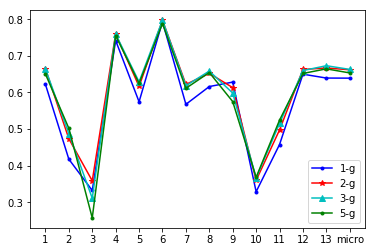

In [50]:
plt.plot(m1.values(),'b.-',label='1-g')
plt.plot(m2.values(),'r*-',label='2-g')
plt.plot(m3.values(),'c^-',label='3-g')
plt.plot(m5.values(),'g.-',label='5-g')
plt.legend()
plt.xticks(range(14),range(1,14)+['micro'])

In [56]:
for i in map(lambda x: 100*x, m5.values()):
    print i

65.0578120231
50.2106708345
25.7129626201
75.5427059388
62.5033069204
78.8453783892
61.1425503319
65.452570983
57.5146956744
36.8122731842
52.4442235667
65.2021430636
66.4582640848
65.3429924906


### Mean AP

In [58]:
np.mean(m1.values()[:-1])

0.56698232818222349

In [59]:
np.mean(m2.values()[:-1])

0.59589863175345625

In [60]:
np.mean(m3.values()[:-1])

0.5953359413014

In [61]:
np.mean(m5.values()[:-1])

0.58684581354987209

### a more beautiful repr

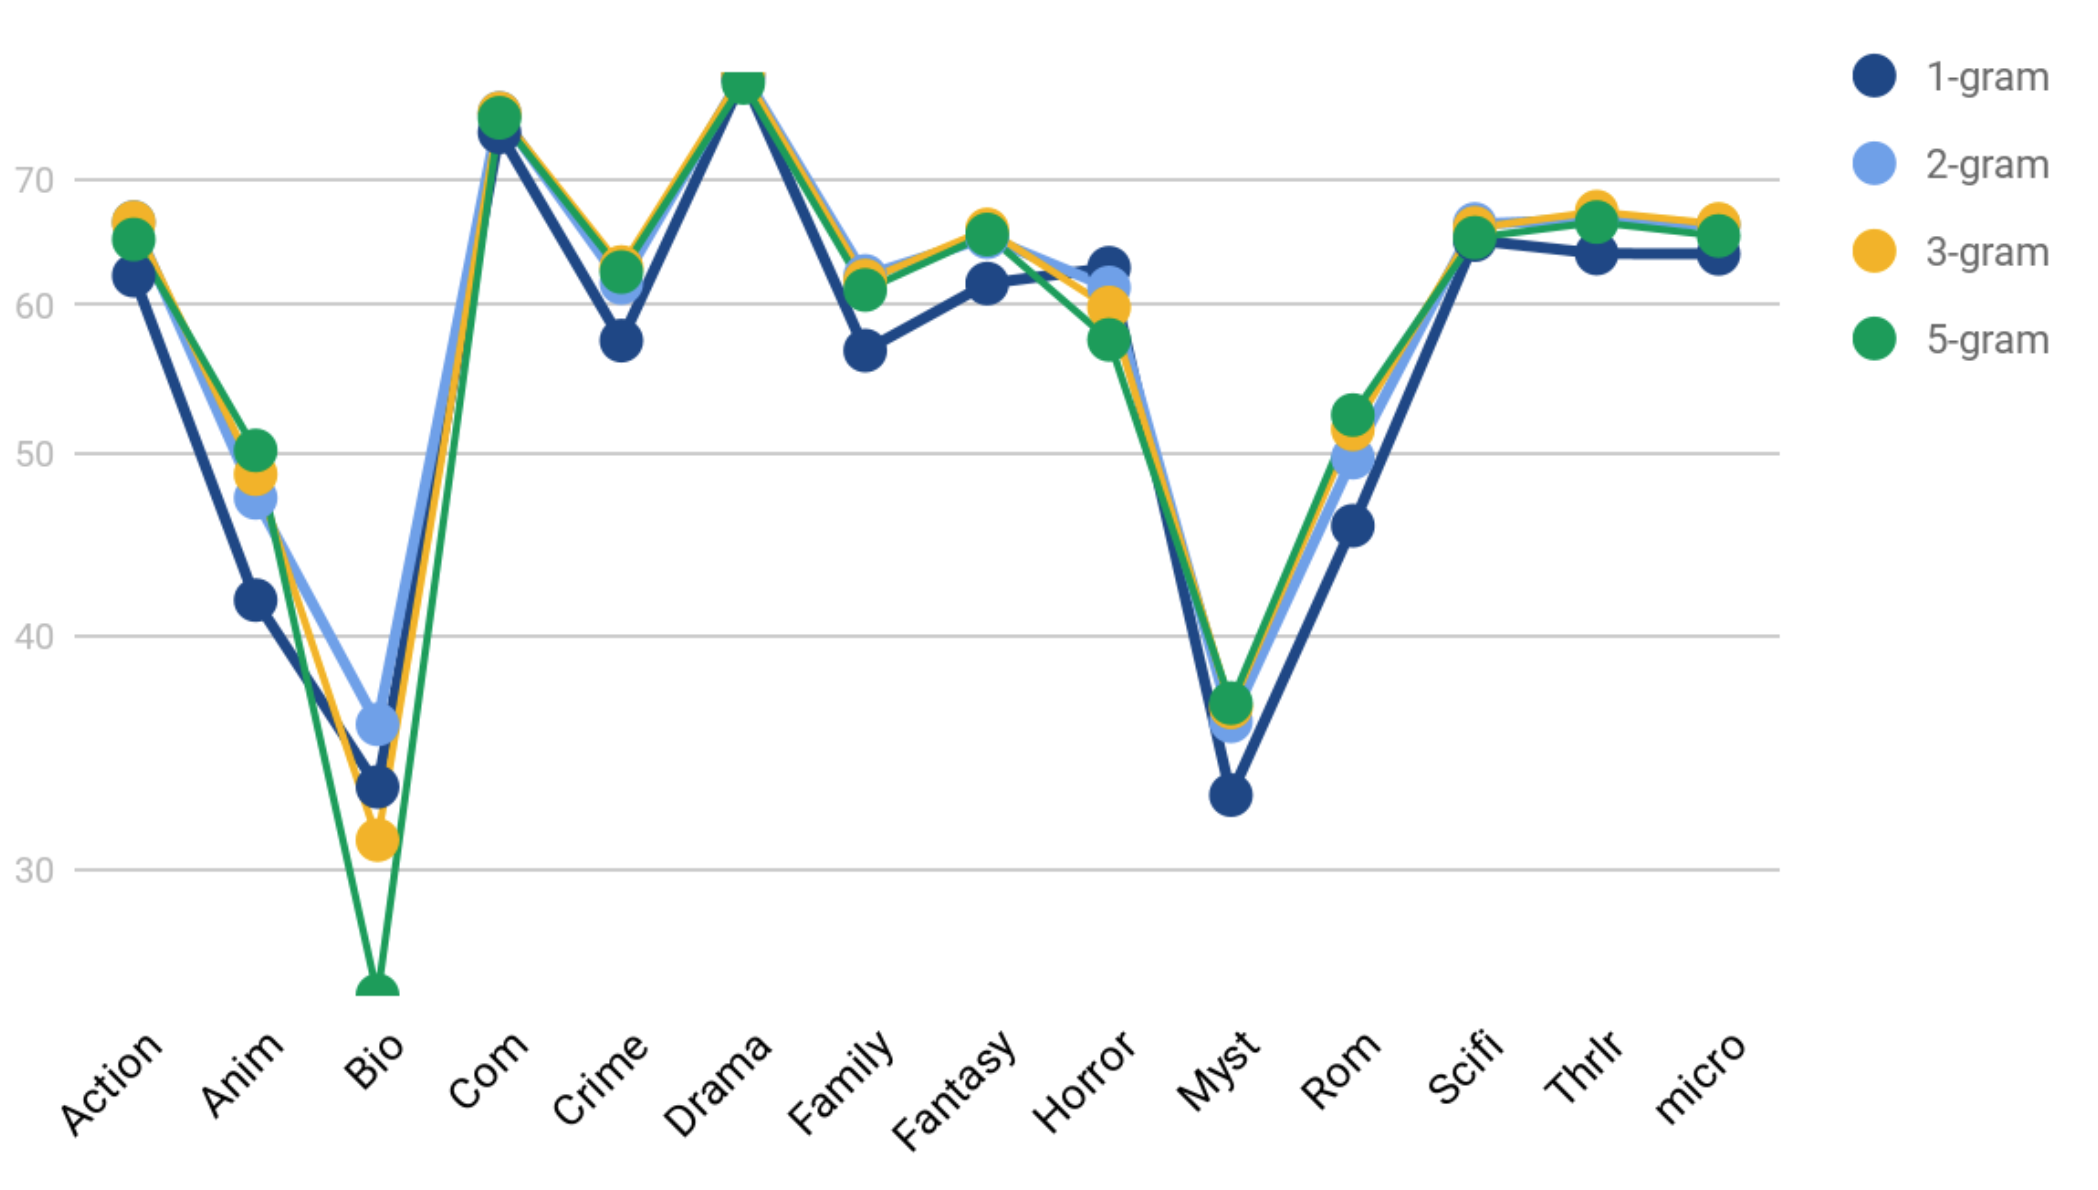

In [63]:
from IPython.display import Image
Image("graph.png")

### Conclusion

There is a significant improvement in using 2-grams over 1-grams. However, diminishing returns when extending over 3-grams.